In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
#from joblib import dump
#from joblib import load

In [2]:
df = pd.read_csv('Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Exploratory Data Analysis

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

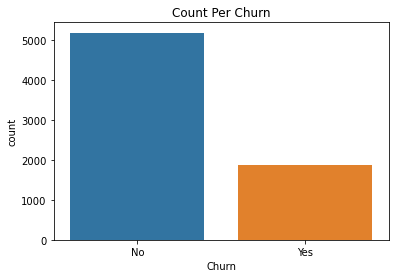

In [7]:
plt.title('Count Per Churn')
sns.countplot(x=df['Churn']);

In [8]:
no_totalcharge = df[df['tenure'] == 0].index

In [9]:
df = df.drop(no_totalcharge)

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


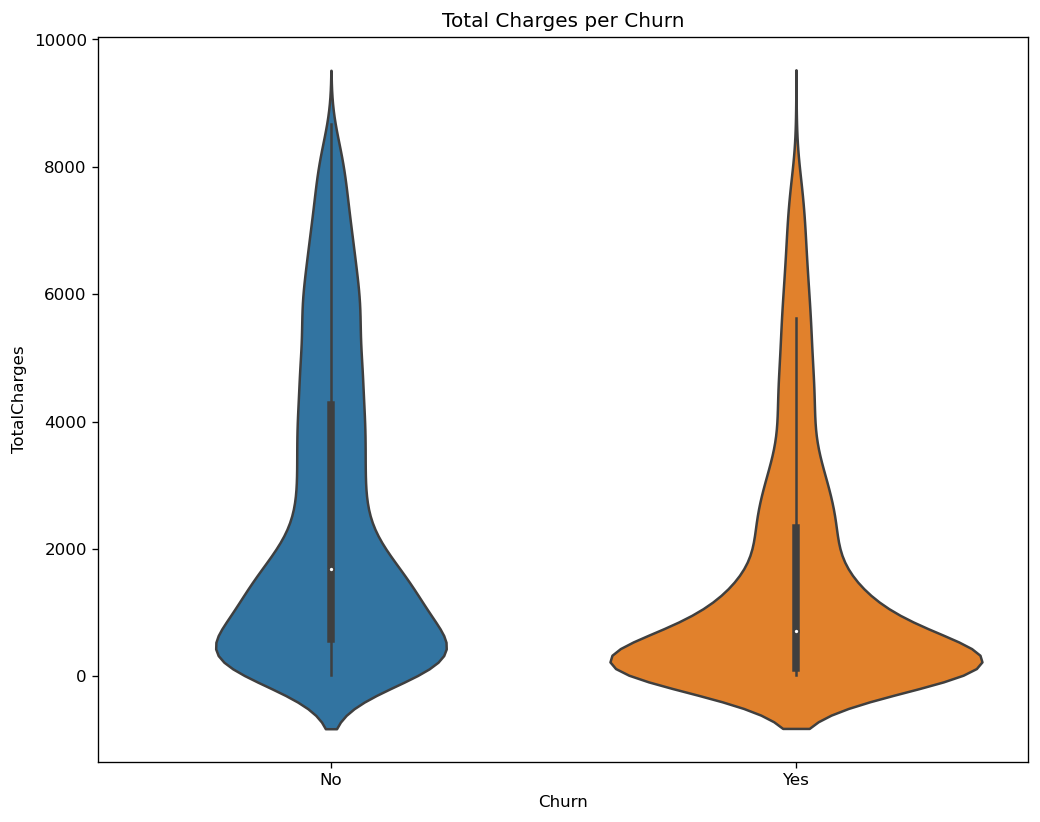

In [13]:
plt.figure(figsize=(10,8), dpi=120)
plt.title('Total Charges per Churn')
sns.violinplot(x=df['Churn'], y=df['TotalCharges']);

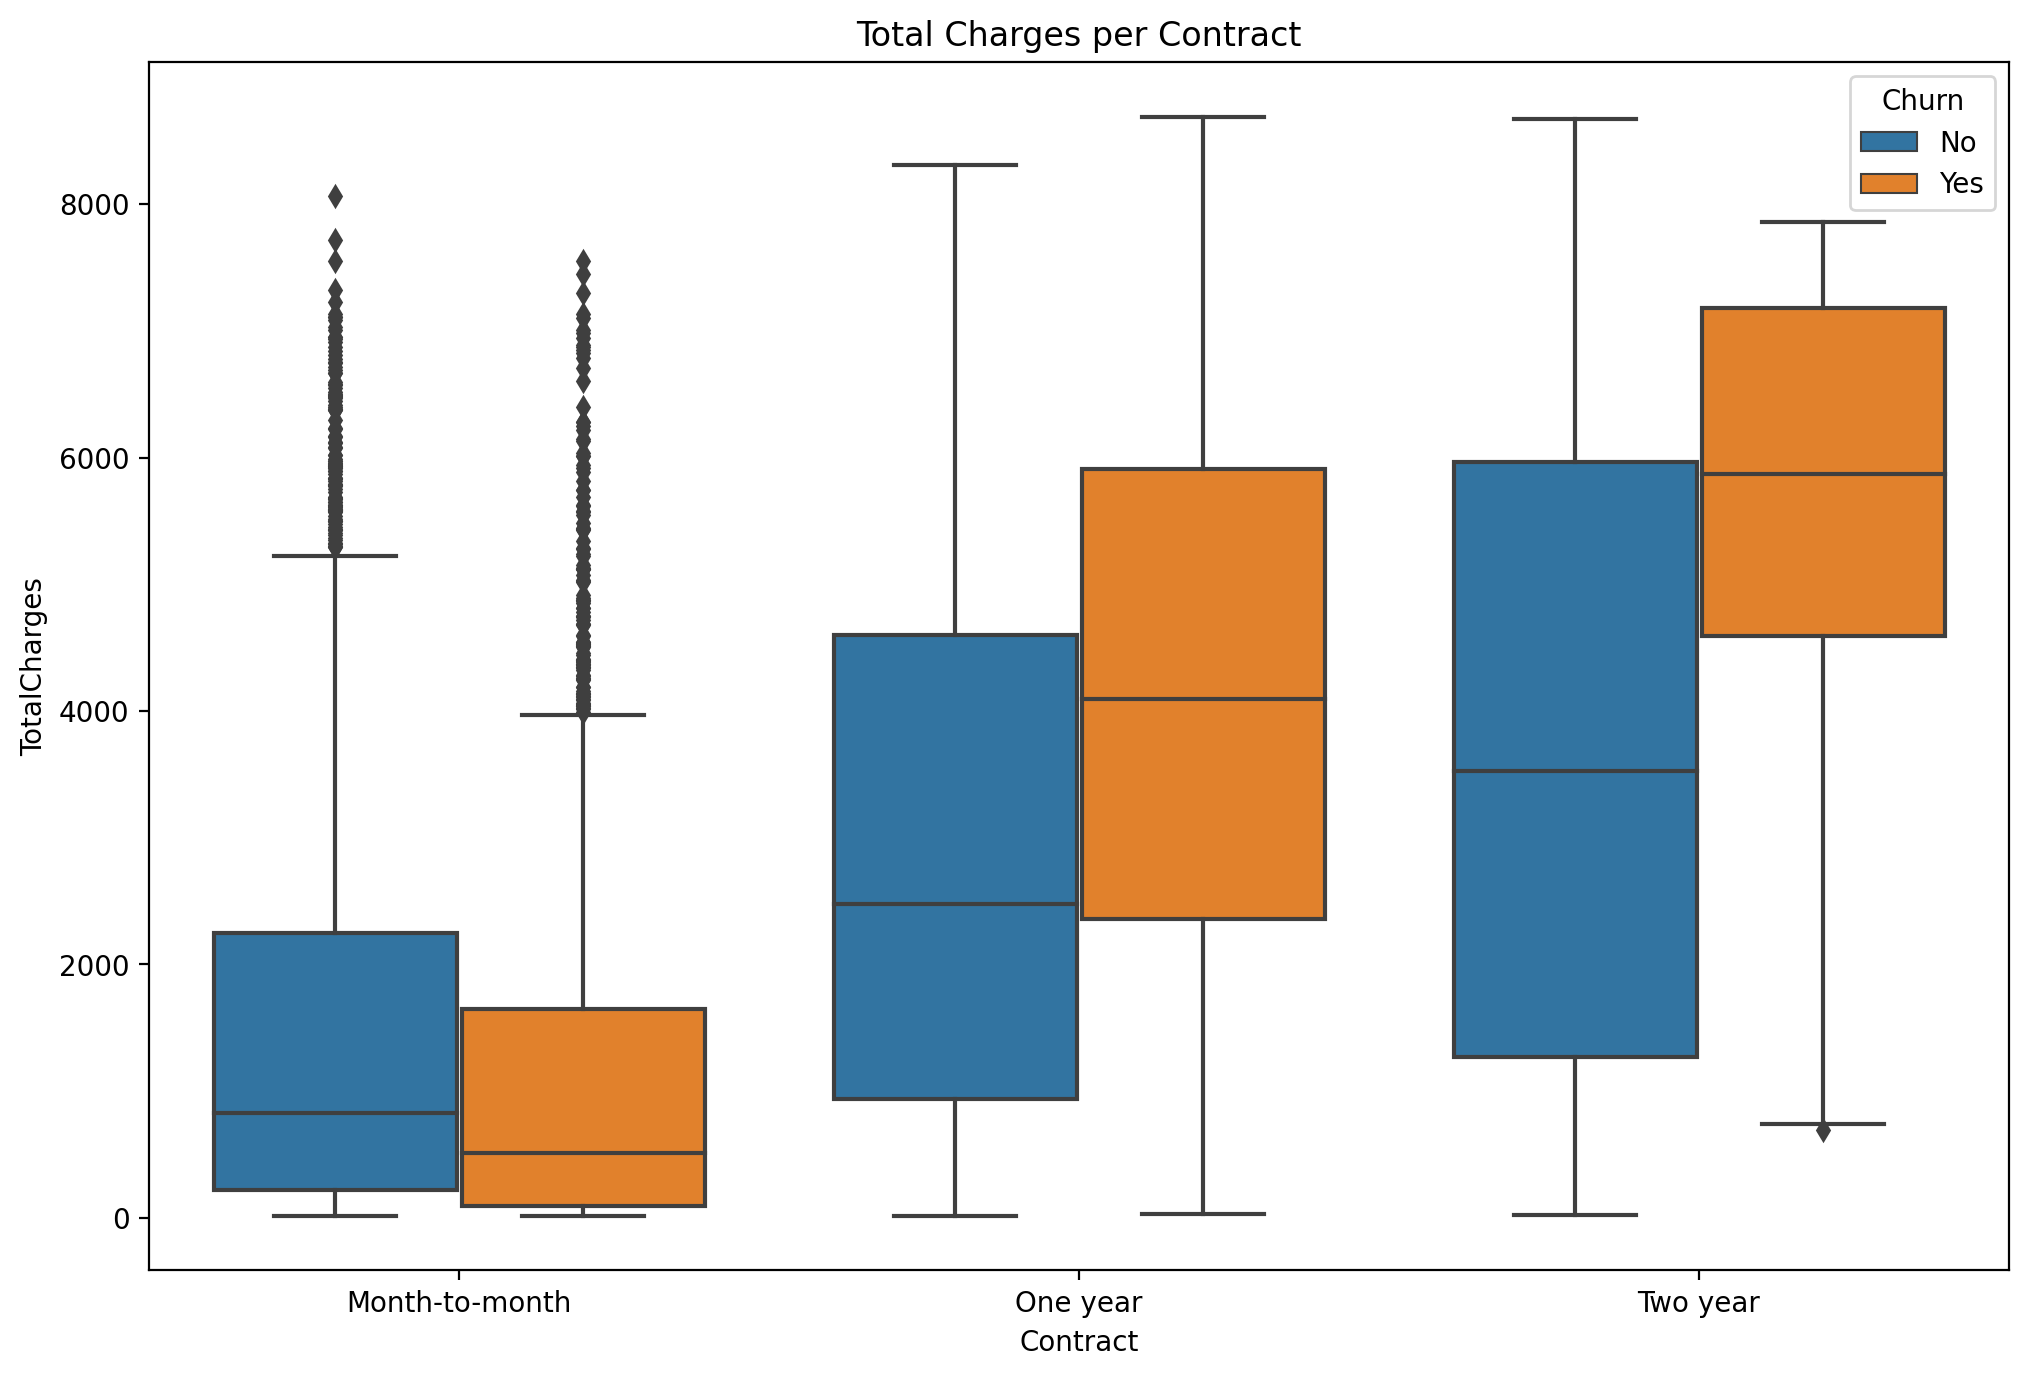

In [14]:
plt.figure(figsize=(12,8), dpi=200)
plt.title('Total Charges per Contract')
sns.boxplot(data=df, x='Contract', y='TotalCharges', hue='Churn');

In [15]:
feature = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]).corr()

In [16]:
new_feature = feature['Churn_Yes'].sort_values().iloc[1:-1]

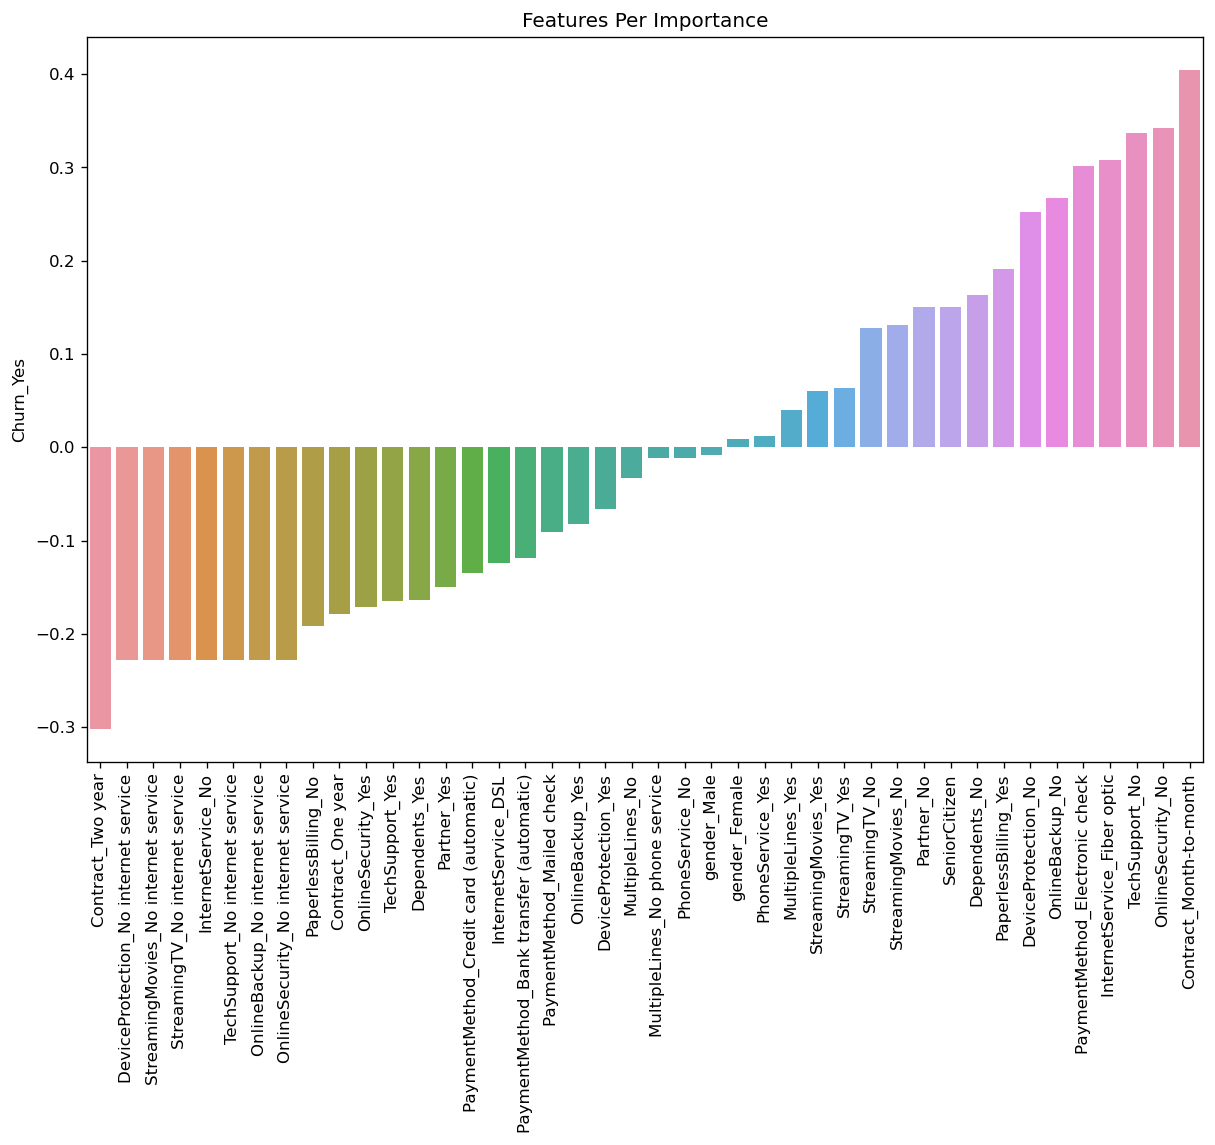

In [17]:
plt.figure(figsize=(12,8), dpi=120)
plt.title('Features Per Importance')
sns.barplot(x=new_feature.index, y=new_feature)
plt.xticks(rotation=90);

## Churn Analysis

In [18]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

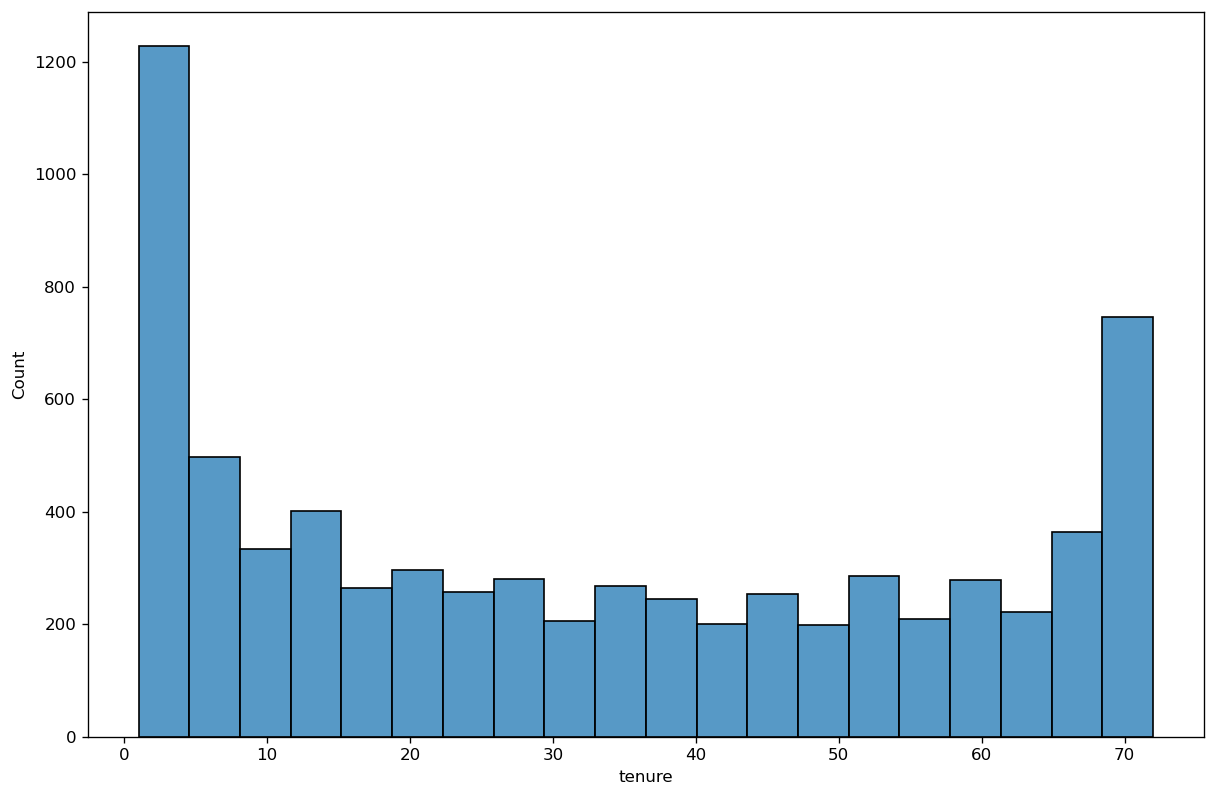

In [19]:
plt.figure(figsize=(12,8), dpi=120)
sns.histplot(data=df, x='tenure', bins=20);

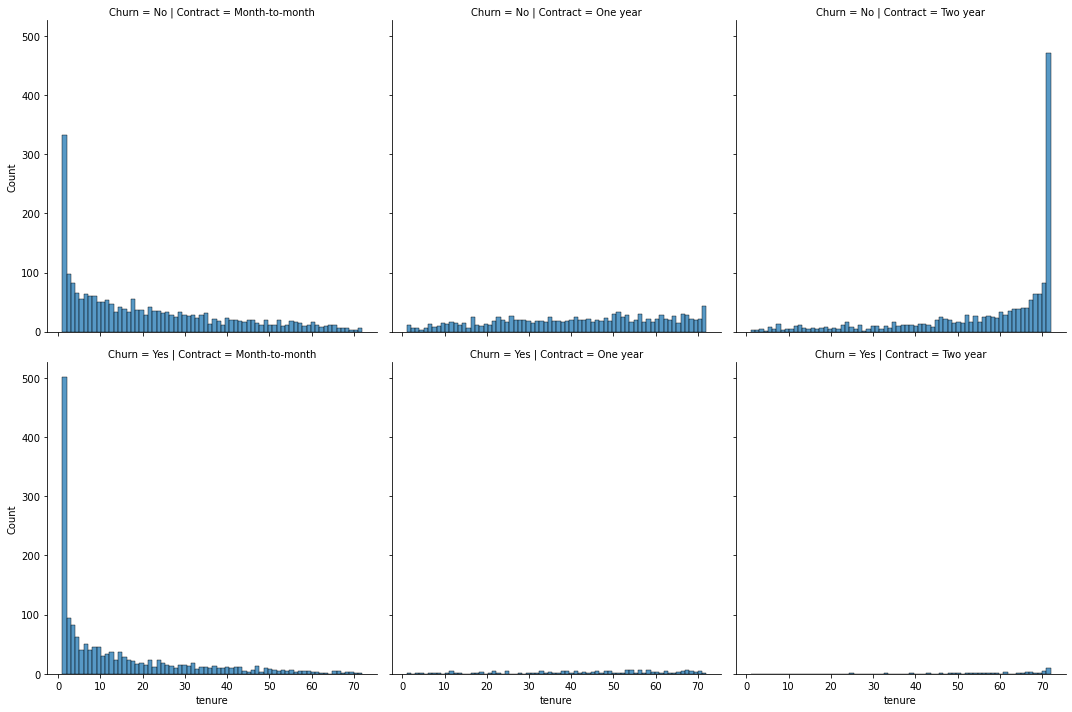

In [20]:
sns.displot(data=df, x='tenure', bins=70, col='Contract', row='Churn')

In [21]:
#sns.catplot(data=df, x='Contract',col='Churn', kind='count');

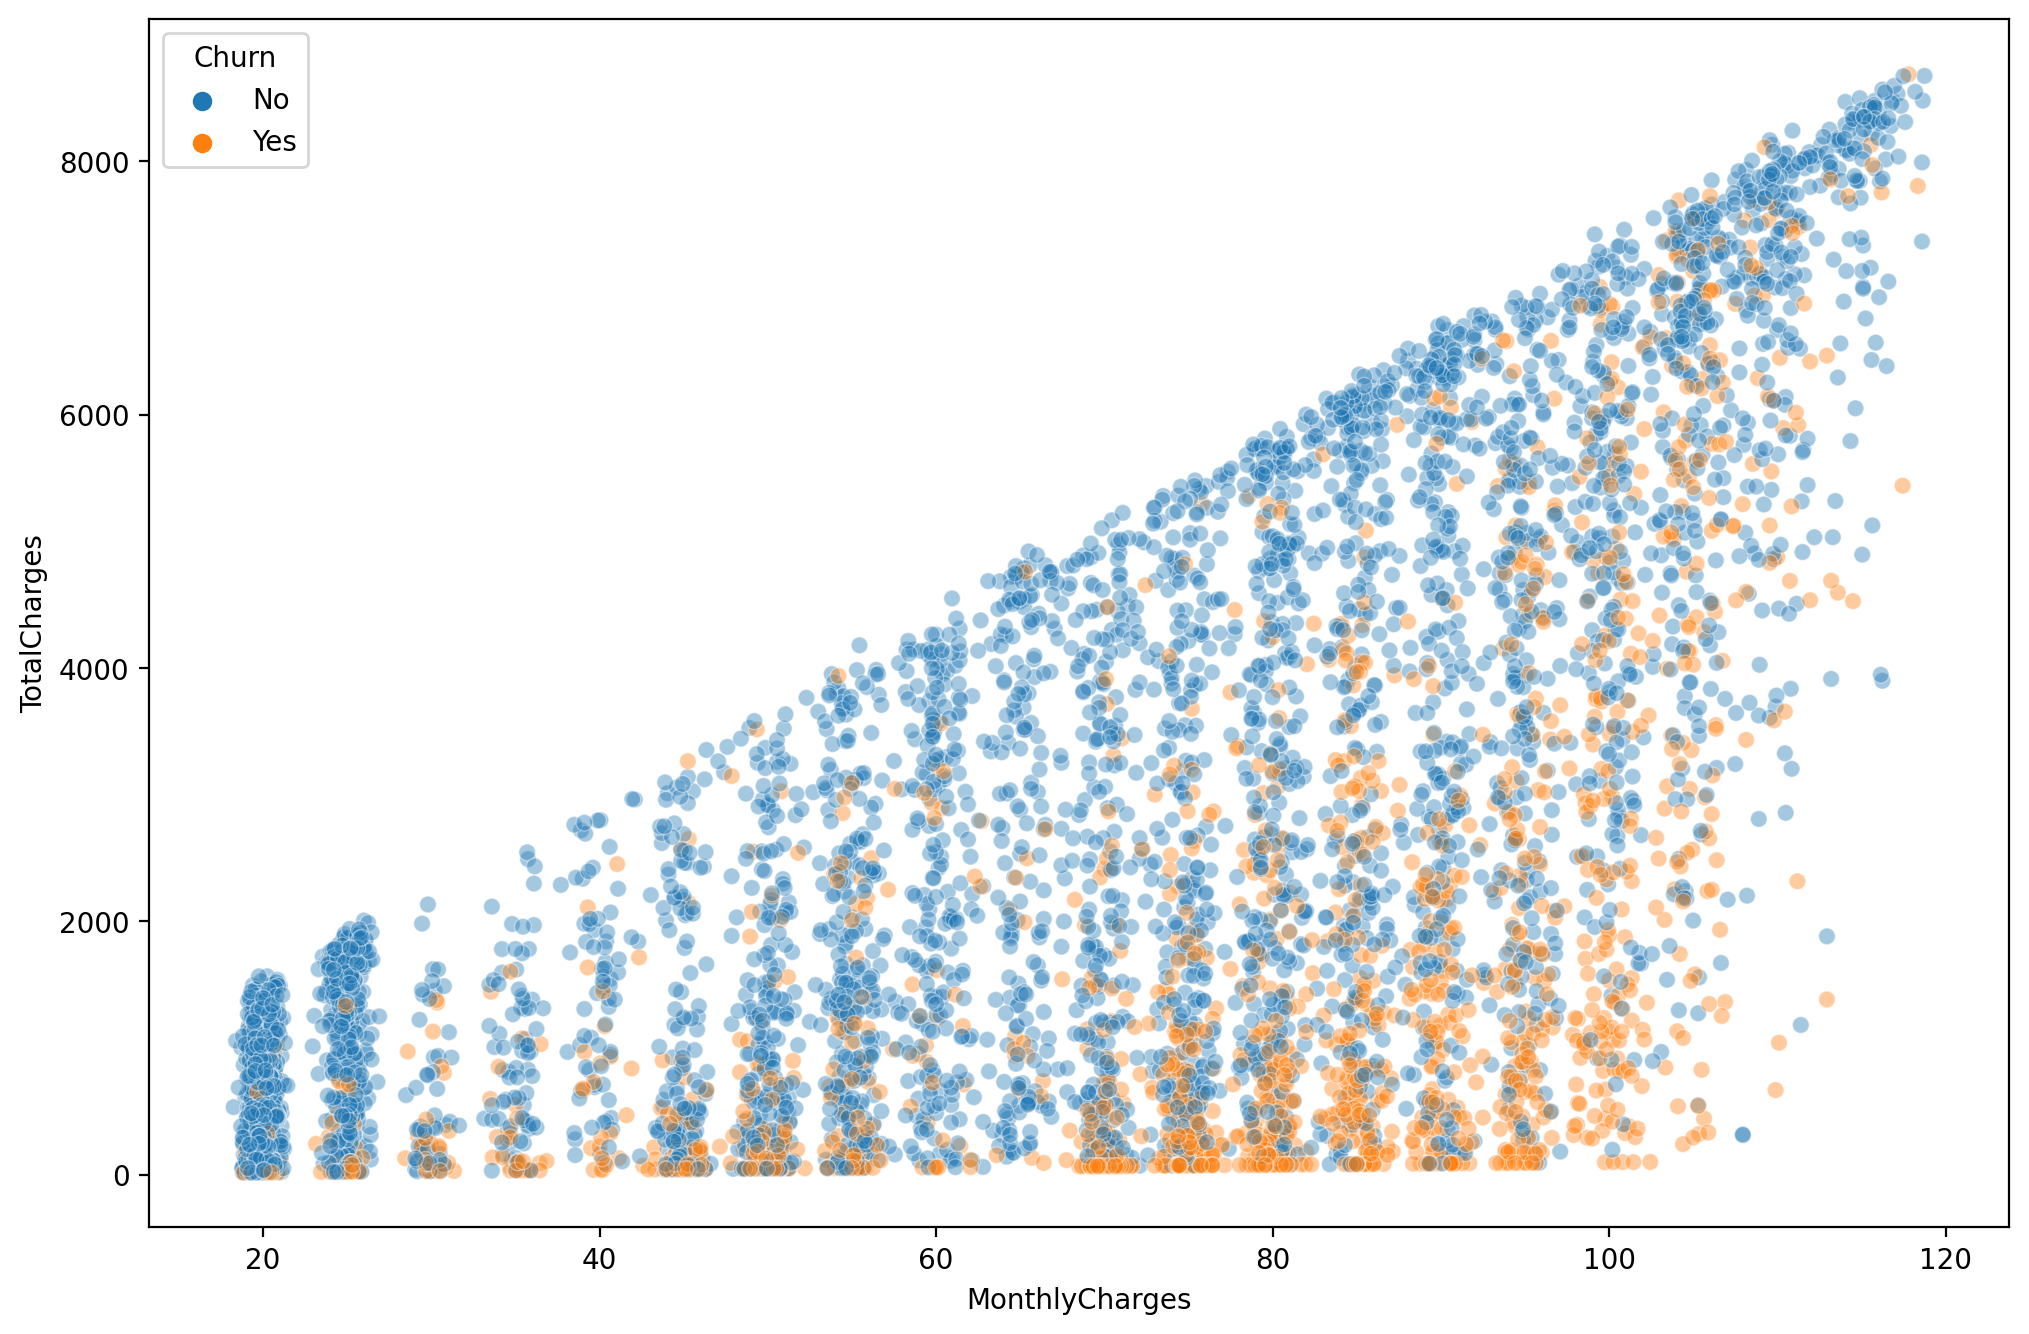

In [22]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges',
                            hue='Churn', alpha=0.4);

In [23]:
yes_churn = df.groupby(['Churn', 'tenure']).count().transpose()['Yes']

In [24]:
no_churn = df.groupby(['Churn', 'tenure']).count().transpose()['No']

In [25]:
churn_rate = 100 * yes_churn/ (no_churn + yes_churn)

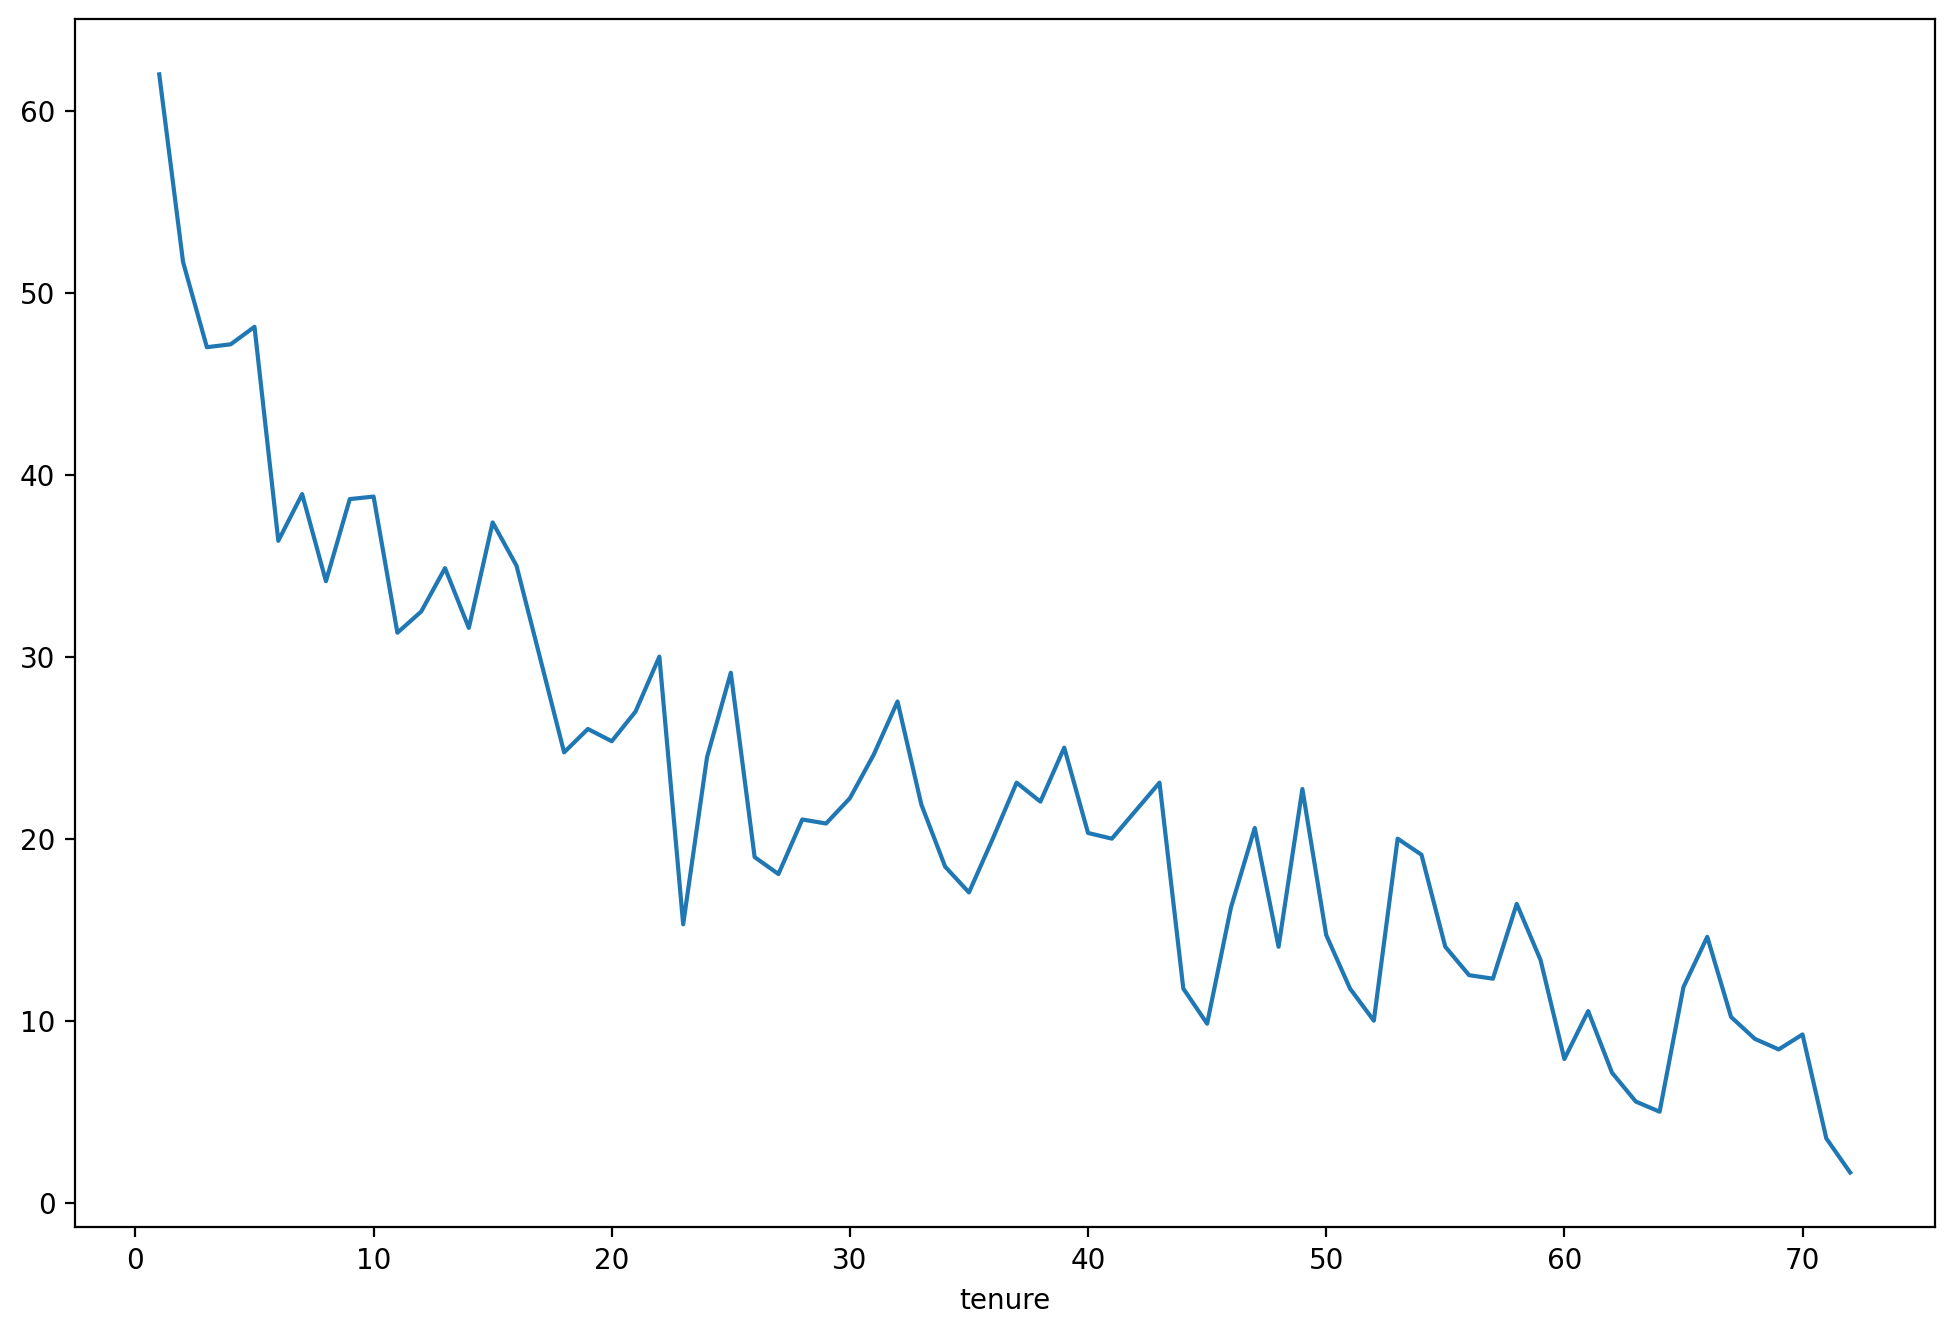

In [26]:
plt.figure(figsize=(12,8), dpi=200)
churn_rate.transpose()['customerID'].plot();
#y_label=('Tenure Percentage')

In [27]:
#df['Tenure Cohort'] = df.map({(df['Tenure'] < 12) : '0-12 Months'})

def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [28]:
df['Tenure_cohort'] = df['tenure'].apply(cohort)

In [29]:
df[['tenure', 'Tenure_cohort']]

,tenure,Tenure_cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
...,...,...
7038,24,12-24 Months
7039,72,Over 48 Months
7040,11,0-12 Months
7041,4,0-12 Months


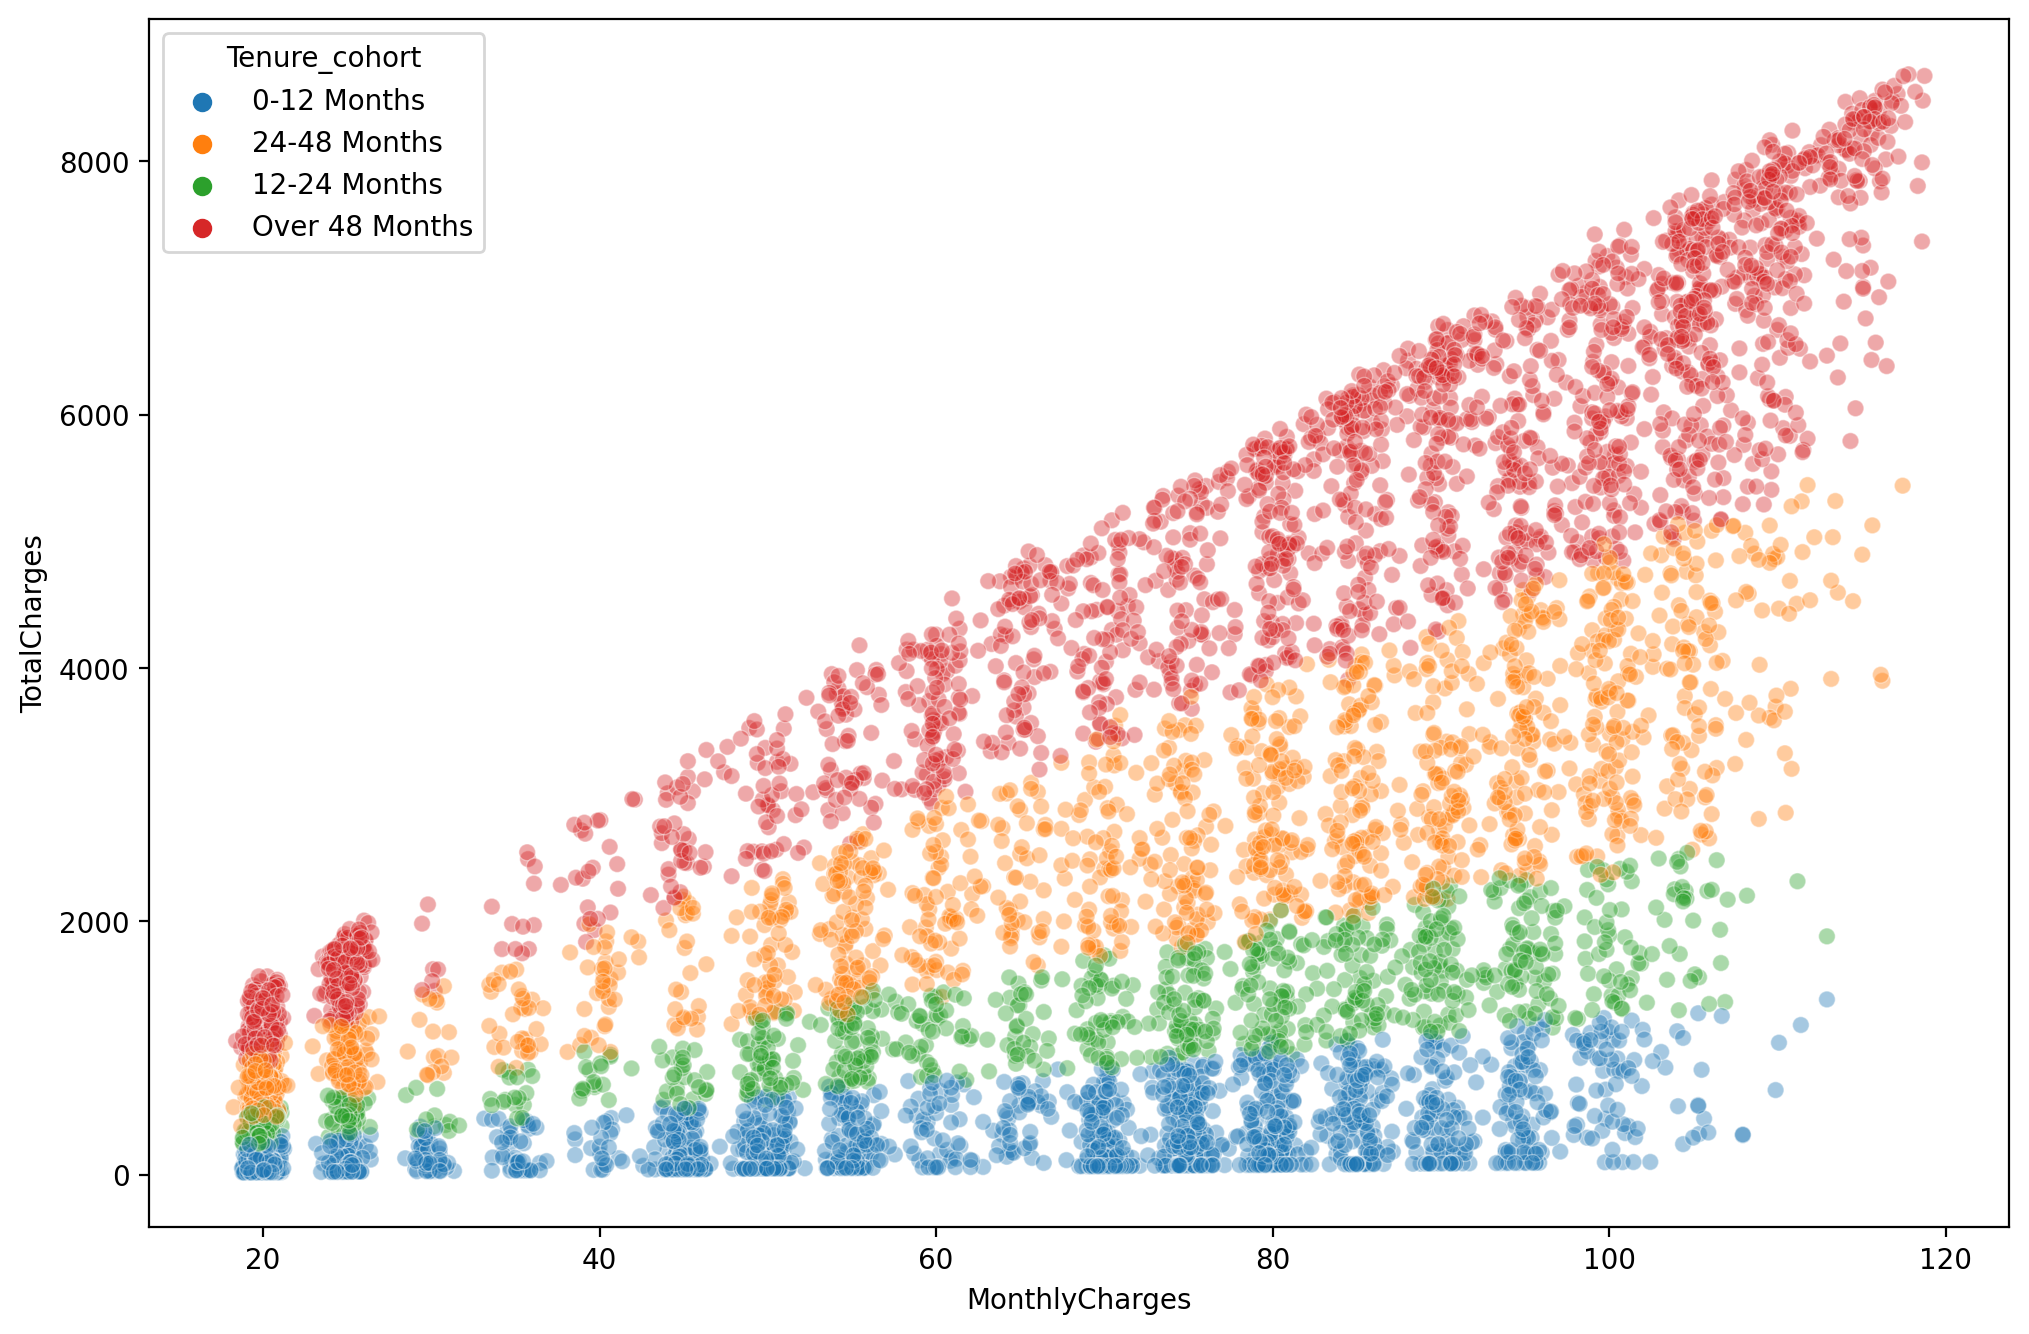

In [30]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges',
                            hue='Tenure_cohort', alpha=0.4);

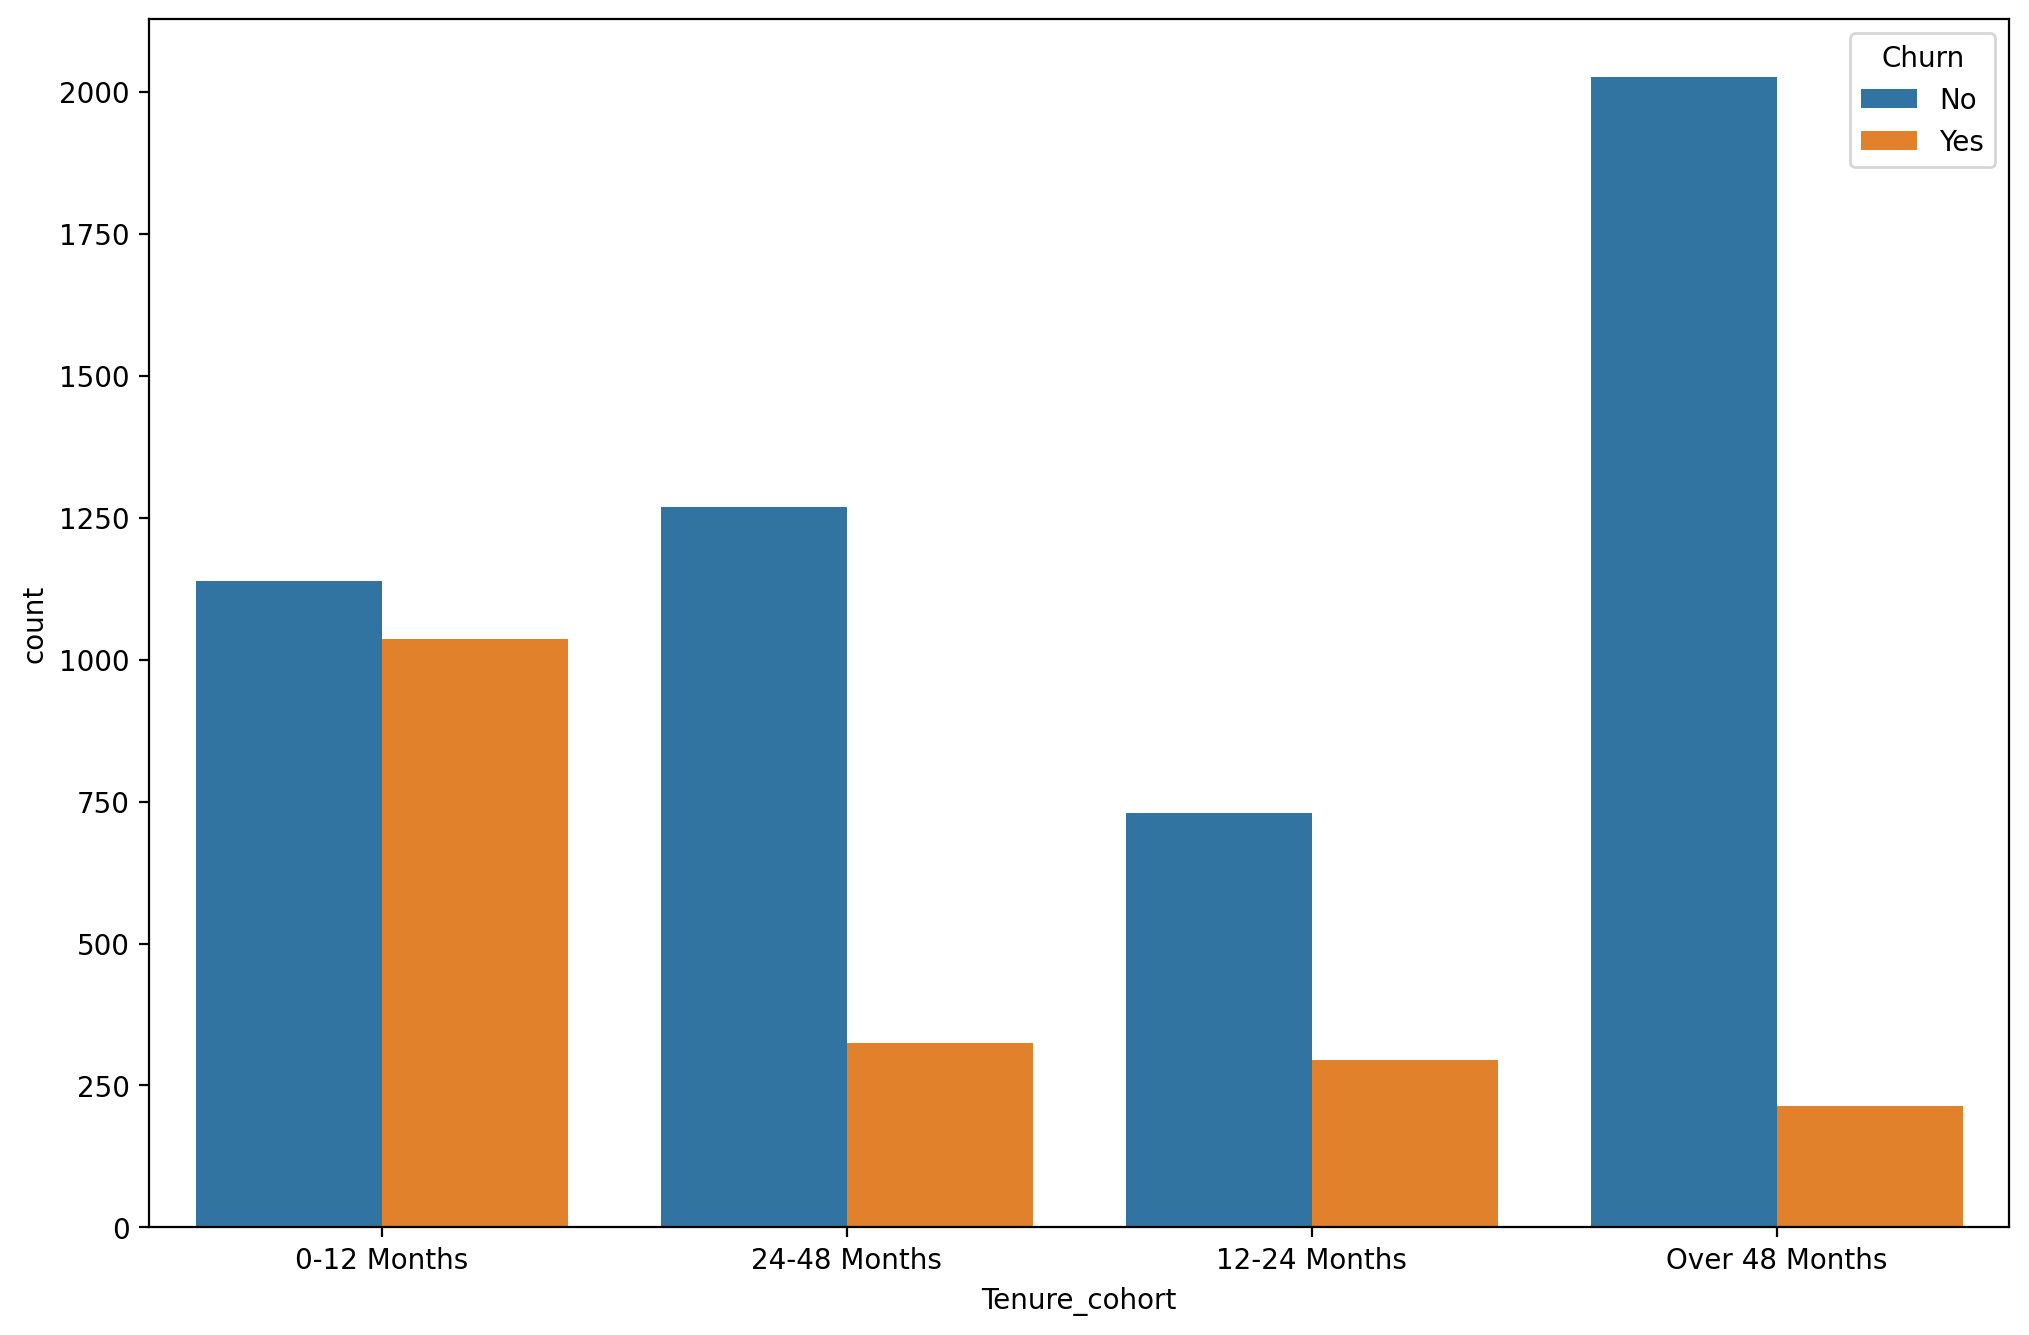

In [31]:
plt.figure(figsize=(12,8), dpi=200)
sns.countplot(data=df, x='Tenure_cohort', hue='Churn');

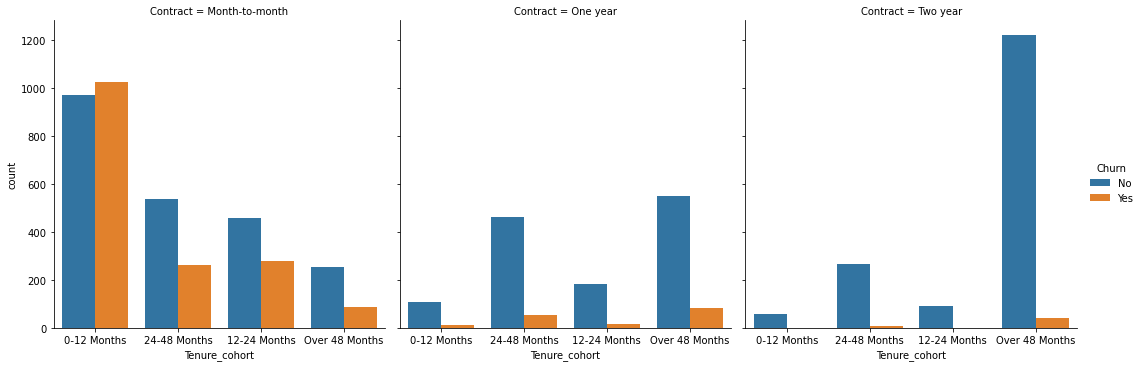

In [32]:
sns.catplot(data=df, x='Tenure_cohort', hue='Churn', kind='count', col='Contract')

## Modelling

In [33]:
X = df.drop(['Churn', 'customerID', 'tenure'], axis=1)

In [34]:
encoders = {}

for column in X.columns:
    le = LabelEncoder()
    
    encoder = le.fit(X[column])
    X[column] = encoder.transform(X[column])
    
    encoders[column] = encoder
    
X.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Tenure_cohort
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,142,74,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,497,3624,2
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,435,536,0
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,266,3570,2
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,728,674,0


In [35]:
y = df['Churn']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dt = DecisionTreeClassifier(max_depth=6)

In [40]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [41]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [42]:
preds = dt.predict(X_test)

In [43]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          No       0.87      0.88      0.88       557
         Yes       0.54      0.52      0.53       147

    accuracy                           0.81       704
   macro avg       0.70      0.70      0.70       704
weighted avg       0.80      0.81      0.80       704



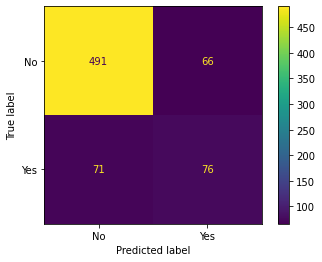

In [44]:
plot_confusion_matrix(dt, X_test, y_test);

In [45]:
importance = pd.DataFrame(data = dt.feature_importances_, index= X.columns,
                             columns=['Feat Imp']).sort_values('Feat Imp')

In [46]:
importance = importance[importance['Feat Imp']>0]

In [47]:
importance

,Feat Imp
StreamingMovies,0.001244
MultipleLines,0.002024
PaperlessBilling,0.003327
PhoneService,0.004325
gender,0.004465
StreamingTV,0.005087
TechSupport,0.006526
SeniorCitizen,0.009006
PaymentMethod,0.013254
OnlineBackup,0.015275


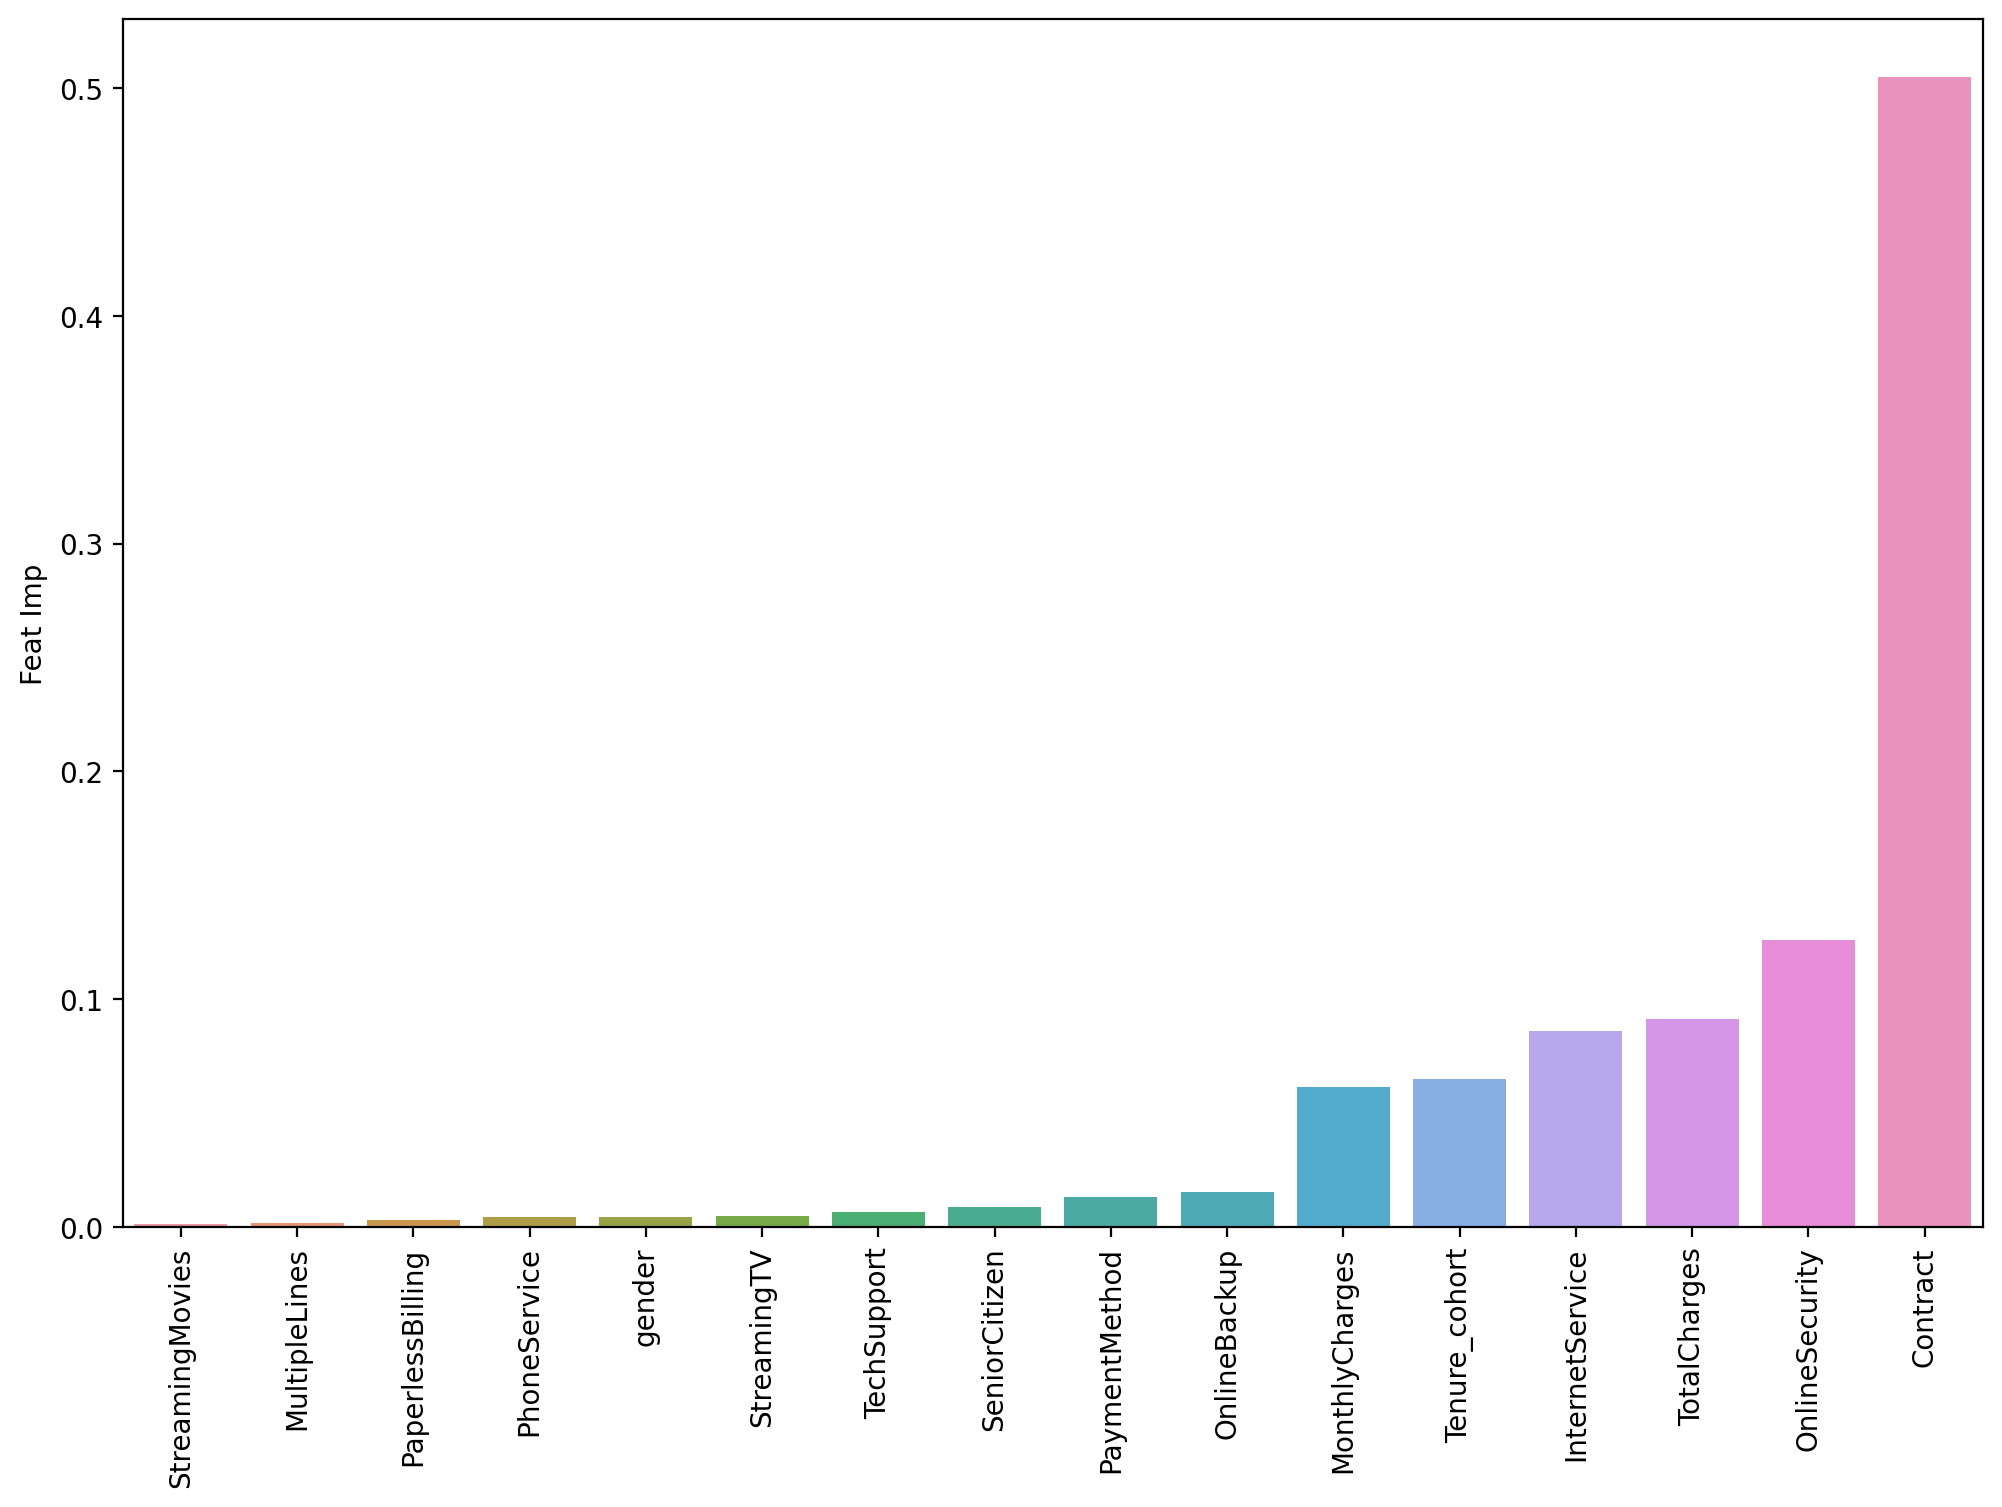

In [48]:
plt.figure(figsize=(12,8), dpi=200)
sns.barplot(data=importance, x=importance.index, y='Feat Imp')
plt.xticks(rotation=90);

In [49]:
from sklearn.tree import plot_tree

In [50]:
#plot_tree(dt);

## Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf = RandomForestClassifier(max_depth = 6)

In [53]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6)

In [54]:
rf_preds = rf.predict(X_test)

In [55]:
print(classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

          No       0.87      0.93      0.90       557
         Yes       0.63      0.47      0.54       147

    accuracy                           0.83       704
   macro avg       0.75      0.70      0.72       704
weighted avg       0.82      0.83      0.82       704



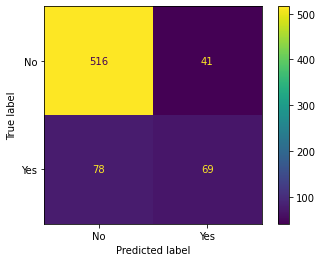

In [56]:
plot_confusion_matrix(rf, X_test, y_test);

## Boosting trees

In [57]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

In [58]:
ada_model = AdaBoostClassifier(n_estimators=100)

In [59]:
gb_model = GradientBoostingClassifier()

In [60]:
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [61]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [62]:
ada_preds = ada_model.predict(X_test)

In [63]:
gb_preds = gb_model.predict(X_test)

In [64]:
print(classification_report(y_test, ada_preds))

              precision    recall  f1-score   support

          No       0.88      0.89      0.89       557
         Yes       0.57      0.53      0.55       147

    accuracy                           0.82       704
   macro avg       0.72      0.71      0.72       704
weighted avg       0.81      0.82      0.81       704



In [65]:
print(classification_report(y_test, gb_preds))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



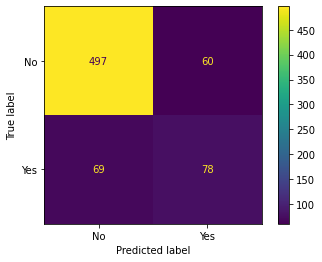

In [66]:
plot_confusion_matrix(ada_model, X_test, y_test);

### Making Predictions

In [67]:
ada_preds = ada_model.predict(X_test)
#print(ada_preds)

### Saving the trained model

In [68]:
import pickle

In [69]:
pickle_out = open("classifier.pkl", mode = "wb")
pickle.dump(ada_model, pickle_out)
pickle_out.close()

In [70]:
#dump(ada_model, 'filename.joblib')

In [71]:
#loaded_model = load('filename.joblib') 

In [72]:
#filename = 'trained_model.sev'
#pickle.dump(ada_model, open(filename, 'wb'))

In [73]:
## loading the saved model
#loaded_model = pickle.load(open('classifier.pkl', 'rb'))

In [74]:
input_data = (0,0,0,0,1,0,1,0,0,2,2,2,2,2,0,1,1293,5362,3)

# Changing the input data to numpy
input_data_as_np_array = np.asarray(input_data)

# Reshape the array as we are predicting to one instance
input_data_reshaped = input_data_as_np_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)
if (prediction[0] == 'Yes'):
    print('This person Churned')
else:
    print('This person did not churn')

NameError: name 'loaded_model' is not defined

In [ ]:
#df.shape

In [ ]:
df['Tenure_cohort'].unique()

In [ ]:
X.columns

In [ ]:
df.InternetService.value_counts()

In [ ]:
import streamlit

In [ ]:
df['Tenure_cohort'].unique()

In [ ]:
X['Tenure_cohort'].unique()

In [ ]:
X['OnlineBackup'].head()

In [ ]:
df['OnlineBackup'].head()

In [ ]:
df.head().iloc[0]

In [ ]:
import pickle 
print(pickle.format_version)